# Assignment 3.3

# Image Caption Retrieval Model

### 1. Data preprocessing

We will use Microsoft COCO (Common Objects in Context) data set to train our "Image Caption Retrieval Model". This data set consists of pretrained 10-crop VGG19 features (Neural codes) and its corresponding text caption. 


In [74]:
from __future__ import print_function

import os
import sys
import numpy as np
import pandas as pd
from collections import OrderedDict

DATA_PATH = 'data'
IMAGE_DATA= 'val2014'
EMBEDDING_PATH = 'embeddings'
MODEL_PATH = 'models'

You will need to create above directories and locate data set provided in directory 'data'

#### Reading pairs of image (VGG19 features) - caption data

In [2]:
# DO NOT CHANGE BELOW CODE

import collections

np_train_data = np.load(os.path.join(DATA_PATH,'train_data.npy'))
np_val_data = np.load(os.path.join(DATA_PATH,'val_data.npy'))

train_data = collections.OrderedDict()
for i in range(len(np_train_data.item())):
    cap =  np_train_data.item()['caps']
    img =  np_train_data.item()['ims']
    train_data['caps'] = cap
    train_data['ims'] = img
    
val_data = collections.OrderedDict()
for i in range(len(np_val_data.item())):
    cap =  np_val_data.item()['caps']
    img =  np_val_data.item()['ims']
    val_data['caps'] = cap
    val_data['ims'] = img

In [ ]:
################### BEGIN DEBUGGING (UNIMPORTANT PART, YOU CAN SKIP) DELETE THIS LATER #########################################

In [76]:
np_train_data.item().keys()

dict_keys(['ims', 'caps'])

In [176]:
val_data['caps']

[b'a child holding a flowered umbrella and petting a yak',
 b'a young man holding an umbrella next to a herd of cattle',
 b'a young boy barefoot holding an umbrella touching the horn of a cow',
 b'a young boy with an umbrella who is touching the horn of a cow',
 b'a boy holding an umbrella while standing next to livestock',
 b'a narrow kitchen filled with appliances and cooking utensils',
 b'a galley kitchen with cabinets and appliances on both sides',
 b'a hallway leading into a white kitchen with appliances',
 b'doorway view of a kitchen with a sink stove refrigerator and pantry',
 b'the pantry door of the small kitchen is closed',
 b'a little girl holding a kitten next to a blue fence',
 b'girl in a tank top holding a kitten in her back yard',
 b'a young girl is holding a small cat',
 b'girl with a yellow shirt holding a small cat',
 b'a girl smiles as she holds a kitty cat',
 b'a toilet sitting in a bathroom next to a sink',
 b'a toilet in a bathroom with green faded paint',
 b'a b

In [242]:
val_image_ids[100]

2712

In [181]:
val_data['ims'][0].shape

(4096,)

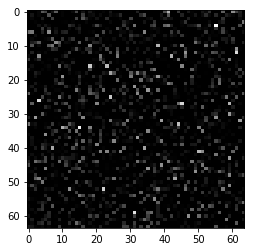

In [188]:
show_img(val_data['ims'][0])

In [74]:
np.asarray(np_train_data.item()['ims']).shape


(5000, 4096)

In [91]:
np.asarray(np_val_data.item()['caps']).shape

(25000,)

In [138]:
np_train_data.item()['caps'][0]


b'a woman wearing a net on her head cutting a cake'

In [81]:
# example of caption
np_train_data.item()['caps'][0]

b'a woman wearing a net on her head cutting a cake'

In [142]:
# example of pre-computed VGG19 features
train_data['caps'][0]

b'a woman wearing a net on her head cutting a cake'

In [4]:
coco_instances_val.keys()

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

In [5]:
coco_instances_val['images']

[{'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
  'date_captured': '2013-11-14 11:18:45',
  'file_name': 'COCO_val2014_000000391895.jpg',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'height': 360,
  'id': 391895,
  'license': 3,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000522418.jpg',
  'date_captured': '2013-11-14 11:38:44',
  'file_name': 'COCO_val2014_000000522418.jpg',
  'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg',
  'height': 480,
  'id': 522418,
  'license': 4,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000184613.jpg',
  'date_captured': '2013-11-14 12:36:29',
  'file_name': 'COCO_val2014_000000184613.jpg',
  'flickr_url': 'http://farm3.staticflickr.com/2169/2118578392_1193aa04a0_z.jpg',
  'height': 336,
  'id': 184613,
  'license': 3,
  'width': 500},
 {'coco_url': 'http://images.cocoda

In [7]:
coco_caption_val.keys()

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [8]:
len(coco_caption_val['annotations'])

202654

In [9]:
coco_caption_val['annotations'][0]

{'caption': 'A bicycle replica with a clock as the front wheel.',
 'id': 37,
 'image_id': 203564}

In [12]:
#traindata_ims= 10k of 4096
#traindata_caps= 50k of ??? 40-50?
#valdata_ims= 5k of 4096
#valdata_cas= 25k of ???

len(words_indices)

11473

In [29]:
x_caption

array([[  2,  21, 162, ...,   0,   0,   0],
       [140, 871,  93, ...,   0,   0,   0],
       [ 79,  18,   7, ...,   0,   0,   0],
       ...,
       [  2,  10,  25, ...,   0,   0,   0],
       [  2,  20,  42, ...,   0,   0,   0],
       [  2, 374,   9, ...,   0,   0,   0]])

In [30]:
train_caps

['a woman wearing a net on her head cutting a cake',
 'a woman cutting a large white sheet cake',
 'a woman wearing a hair net cutting a large sheet cake',
 'there is a woman that is cutting a white cake',
 'a woman marking a cake with the back of a chefs knife',
 'a young boy standing in front of a computer keyboard',
 'a little boy wearing headphones and looking at a computer monitor',
 'he is listening intently to the computer at school',
 'a young boy stares up at the computer monitor',
 'a young kid with head phones on using a computer',
 'a boy wearing headphones using one computer in a long row of computers',
 'a little boy with earphones on listening to something',
 'a group of people sitting at desk using computers',
 'children sitting at computer stations on a long table',
 'a small child wearing headphones plays on the computer',
 'a man is in a kitchen making pizzas',
 'man in apron standing on front of oven with pans and bakeware',
 'a baker is working in the kitchen rolli

In [ ]:
################### END DEBUGGING  ###################################################################################

#### Reading caption and information about its corresponding raw images from Microsoft COCO website

In [3]:
# DO NOT CHANGE BELOW CODE
# use them for your own additional preprocessing step
# to map precomputed features and location of raw images 

import json

with open(os.path.join(DATA_PATH,'instances_val2014.json')) as json_file:
    coco_instances_val = json.load(json_file)
    
with open(os.path.join(DATA_PATH,'captions_val2014.json')) as json_file:
    coco_caption_val = json.load(json_file)

#### Additional preprocessing

In [343]:
# create your own function to map pairs of precomputed features and filepath of raw images
# this will be used later for visualization part
# simple approach: based on matched text caption (see json file)

# YOUR CODE HERE 
print(coco_caption_val.keys())
print(len(coco_instances_val['images']))
print(coco_caption_val['images'][0])
print(coco_caption_val['annotations'][0])
print('========================================')
for i in coco_caption_val['annotations']:
    if(i['image_id']==391895):
        print(i)
#print(coco_caption_val[0])

#todo: mapping





dict_keys(['info', 'images', 'licenses', 'annotations'])
40504
{'license': 3, 'file_name': 'COCO_val2014_000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}
{'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}
{'image_id': 391895, 'id': 770337, 'caption': 'A man with a red helmet on a small moped on a dirt road. '}
{'image_id': 391895, 'id': 771687, 'caption': 'Man riding a motor bike on a dirt road on the countryside.'}
{'image_id': 391895, 'id': 772707, 'caption': 'A man riding on the back of a motorcycle.'}
{'image_id': 391895, 'id': 776154, 'caption': 'A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. '}
{'image_id': 391895, 'id': 7

In [366]:
import re

def mapto(xtrainid):
    guessedcaption=true_caption(x_caption[xtrainid])
    print(guessedcaption)
    img_id=-1
    for i in coco_caption_val['annotations']:
        capt=re.sub('[^0-9a-zA-Z]+', ' ',i['caption']).lower().strip()
#        print(capt)
        if(capt==guessedcaption):
            img_id=i['image_id']
            break
    for i in coco_instances_val['images']:
        if(i['id']==img_id):
            return i['coco_url']
    return 'notfound!'

#### Build vocabulary index 

In [4]:
# DO NOT CHANGE BELOW CODE

def build_dictionary(text):

    wordcount = OrderedDict()
    for cc in text:
        words = cc.split()
        for w in words:
            if w not in wordcount:
                wordcount[w] = 0
            wordcount[w] += 1
    words = list(wordcount.keys())
    freqs = list(wordcount.values())
    sorted_idx = np.argsort(freqs)[::-1]
    

    worddict = OrderedDict()
    worddict['<pad>'] = 0
    worddict['<unk>'] = 1
    for idx, sidx in enumerate(sorted_idx):
        worddict[words[sidx]] = idx+2  # 0: <pad>, 1: <unk>
    

    return worddict

# use the resulting vocabulary index as your look up dictionary
# to transform raw text into integer sequences

all_captions = []
all_captions = train_data['caps'] + val_data['caps']

# decode bytes to string format
caps = []
for w in all_captions:
    caps.append(w.decode())
    
words_indices = build_dictionary(caps)
print ('Dictionary size: ' + str(len(words_indices)))
indices_words = dict((v,k) for (k,v) in words_indices.items())

##add custom
#words_indices = dict((k,v) for (k,v) in words_indices.items())

Dictionary size: 11473


In [111]:
#traindata_ims= 10k of 4096
#traindata_caps= 50k of ??? 40-50?
#valdata_ims= 5k of 4096
#valdata_cas= 25k of ???

len(words_indices)

11473

In [5]:
from keras.layers import Dense, Embedding,Input,LSTM,GRU,Lambda,add,dot,subtract, maximum
from keras.models import Model
import keras.backend as K

c:\users\illia\appdata\local\conda\conda\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 2. Image - Caption Retrieval Model

### Image model

In [6]:
# YOUR CODE HERE 
from keras.layers import Dense, Embedding,Dot,Input,LSTM,GRU,Add, Subtract, concatenate

#image network
img_input = Input(shape=(4096,),name='IMG_input')
condense_img = Dense(1024,name='Dense_IMG')(img_input)



### Caption model

In [7]:
import gensim
from gensim.models import KeyedVectors
path = ".."

#convert GloVe into word2vec format
#gensim.scripts.glove2word2vec.get_glove_info(path)
#gensim.scripts.glove2word2vec.glove2word2vec(path, "glove_converted.txt")

glove = KeyedVectors.load_word2vec_format("../glove_converted.txt", binary=False)



c:\users\illia\appdata\local\conda\conda\envs\tensorflow-gpu\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [8]:
# YOUR CODE HERE

voc_size = len(indices_words)#11k ish
cap_size = 50

caption_input = Input(shape=(cap_size,),name='CAP_input')
noise_input = Input(shape=(cap_size,),name='Noise_input')

# layer for computing dot product between tensors
vocab_dim = 300 # dimensionality of your word vectors
n_symbols = voc_size + 1 # adding 1 to account for 0th index (for masking)
embedding_weights = np.zeros((n_symbols, vocab_dim))
for word,index in words_indices.items():
    try:
        embedding_weights[index, :] = glove[word]
    except KeyError:
        embedding_weights[index, :] = np.zeros(vocab_dim)
# define inputs here
    embedding_layer = Embedding(output_dim=vocab_dim, input_dim=n_symbols, trainable=False)
embedding_layer.build((None,)) # if you don't do this, the next step won't work
embedding_layer.set_weights([embedding_weights])


recurrent_layer = LSTM(1024,name='recurrent_layer')


#inputs into shared layers
embed_caption = embedding_layer(caption_input)
embed_noise = embedding_layer(noise_input)

recurrent_noise = recurrent_layer(embed_noise)
recurrent_caption = recurrent_layer(embed_caption)

### Join model

In [9]:
# YOUR CODE HERE



#noise and real score
cap_image = dot([condense_img,recurrent_caption],1,normalize=True, name='DotProd_postive_score')
noise_image = dot([condense_img,recurrent_noise],1,normalize=True, name='DotProd_negative_score')
conc = concatenate([cap_image,noise_image],axis=-1)



### Main model for training stage

In [10]:
# YOUR CODE HERE

# define your model input and output
print ("loading the training model")
training_model = Model(inputs=[img_input,caption_input,noise_input],outputs=conc)
#training_model = Model(inputs=[img_input,caption_input,noise_input],outputs=ld)
#training_model.compile(optimizer='adam',loss=identity_loss)
training_model.summary()







loading the training model
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
CAP_input (InputLayer)          (None, 50)           0                                            
__________________________________________________________________________________________________
Noise_input (InputLayer)        (None, 50)           0                                            
__________________________________________________________________________________________________
IMG_input (InputLayer)          (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_11473 (Embedding)     (None, 50, 300)      3442200     CAP_input[0][0]                  
                                                                 Noise_input[0][0]

In [53]:
training_model.get_layer("Dense_IMG").get_weights()

[array([[-0.00733399, -0.01113406,  0.01924572, ..., -0.08430635,
         -0.01884567, -0.01170112],
        [ 0.00955606,  0.01646699, -0.00855276, ..., -0.05314958,
          0.02299583, -0.05485604],
        [ 0.03556501,  0.00096706, -0.05231266, ...,  0.01920859,
         -0.02546919,  0.01263173],
        ...,
        [-0.09374408, -0.09285853, -0.10990589, ...,  0.01002811,
         -0.07454843,  0.1013967 ],
        [ 0.10719267,  0.08326511,  0.12943858, ..., -0.00932158,
          0.05466679, -0.10887617],
        [ 0.01866302,  0.00086081, -0.00262594, ...,  0.01134909,
          0.04507111, -0.0455178 ]], dtype=float32),
 array([ 0.04777216,  0.04126221, -0.05346035, ..., -0.04451161,
        -0.0541437 , -0.02933382], dtype=float32)]

In [55]:
training_model.get_layer("Dense_IMG").get_weights()

[array([[-0.00733399, -0.01113406,  0.01924572, ..., -0.08430635,
         -0.01884567, -0.01170112],
        [ 0.00955606,  0.01646699, -0.00855276, ..., -0.05314958,
          0.02299583, -0.05485604],
        [ 0.03556501,  0.00096706, -0.05231266, ...,  0.01920859,
         -0.02546919,  0.01263173],
        ...,
        [-0.09374408, -0.09285853, -0.10990589, ...,  0.01002811,
         -0.07454843,  0.1013967 ],
        [ 0.10719267,  0.08326511,  0.12943858, ..., -0.00932158,
          0.05466679, -0.10887617],
        [ 0.01866302,  0.00086081, -0.00262594, ...,  0.01134909,
          0.04507111, -0.0455178 ]], dtype=float32),
 array([ 0.04777216,  0.04126221, -0.05346035, ..., -0.04451161,
        -0.0541437 , -0.02933382], dtype=float32)]

### Retrieval model

In [11]:
# YOUR CODE HERE

# define your model input and output

print ("loading sub-models for retrieving Neural codes")

caption_model = Model(inputs=caption_input, outputs=recurrent_caption)
caption_model.summary()


image_model = Model(inputs=img_input, outputs=condense_img)
image_model.summary()

loading sub-models for retrieving Neural codes
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CAP_input (InputLayer)       (None, 50)                0         
_________________________________________________________________
embedding_11473 (Embedding)  (None, 50, 300)           3442200   
_________________________________________________________________
recurrent_layer (LSTM)       (None, 1024)              5427200   
Total params: 8,869,400
Trainable params: 5,427,200
Non-trainable params: 3,442,200
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
IMG_input (InputLayer)       (None, 4096)              0         
_________________________________________________________________
Dense_IMG (Dense)            (None, 1024)              4195328   
Total param

### Loss function

We define our loss function as a loss for maximizing the margin between a positive and
negative example.  If we call $p_i$ the score of the positive pair of the $i$-th example, and $n_i$ the score of the negative pair of that example, the loss is:

\begin{equation*}
loss = \sum_i{max(0, 1 -p_i + n_i)}
\end{equation*}

In [26]:
from keras import backend as K

def identity_loss(y_true, y_pred):
    #score = K.maximum(0.0,y_pred)
    loss = K.sum(K.maximum(0.0,1-y_true[i]+y_pred[i]))
    return loss

def max_margin_loss(y_true, y_pred):
    print(y_pred.shape)
    return K.sum(K.maximum(0.0, 1.0 - y_pred[:,0] + y_pred[:,1]))
    #print(loss)
    #return loss

def custom_loss(score):
    score = 1 - score
    loss = max(0,score)
    return loss
   

#### Accuracy metric for max-margin loss
How many times did the positive pair effectively get a higher value than the negative pair?

In [27]:
# YOUR CODE HERE

def accuracy(y_true, y_pred):
    # YOUR CODE HERE
    #print(K.eval(y_pred))
    #cnt=0
    #for i in y_pred:
    #    if ((y_pred-1)*-1)>=0:
    #        cnt+=1    
    #zero = K.zeros_like(y_pred)
    #K.update_sub(one, y_pred)
    #cnt=0
    #for i in range(len(y_pred[0])):
    #    if(y_pred[0]>y_pred[1]):
    #        cnt+=1
    
    #one=K.great_equal(y_pred, K.zeros_like(y_pred))
    #accuracy_ = K.mean(y_pred[0]>y_pred[1])#(cnt*1.0)/len(y_pred[0])#K.mean(y_pred>0)#K.minimum(K.minimum(y_pred,0),1)#K.mean(K.cast(((y_pred-1)*-1)>=0,dtype='int32')) ##(cnt*1.0)/len(y_pred)#K.mean(K.great_equal(y_true, K.round(y_pred)), axis=-1)
    accuracy_ = K.mean(y_pred[:,0]>y_pred[:,1])
    return accuracy_


### Compile model

In [28]:
# DO NOT CHANGE BELOW CODE
print ("compiling the training model")
training_model.compile(optimizer='adam', loss=max_margin_loss, metrics=[accuracy])
image_model.compile(optimizer='adam', loss=max_margin_loss, metrics=[accuracy])
caption_model.compile(optimizer='adam', loss=max_margin_loss, metrics=[accuracy])
#training_model.compile(optimizer='adam', loss=max_margin_loss)

compiling the training model
(?, 2)
(?, 1024)
(?, 1024)


### 3. Data preparation for training the model

* adjust the length of captions into fixed maximum length (50 words)
* sampling caption for each image, while shuffling the image data
* encode captions into integer format based on look-up vocabulary index

In [15]:
# sampling one caption per image
# return image_ids, caption_ids


#['caps']['ims'] 
def sampling_img_cap(data):
    datalen=len(data['ims'])
    image_ids = np.arange(datalen)
    np.random.shuffle(image_ids)
    caption_ids=[image_ids[x]*5+np.random.randint(0, 5) for x in range(datalen)]

    #image_ids=np.zeros((datalen,len(data['ims'][0])))
    #caption_ids=["" for x in range(datalen)]
    #for cnt, img in enumerate(data['ims']):
    #    image_ids[cnt]=img
    #    rnd=np.random.randint(0, 5)
    #    caption_ids[cnt]=data['caps'][cnt*5+rnd][0:50]#capping to 50 length for captions
        
    # YOUR CODE HERE
    
    return image_ids, caption_ids

#train_image_ids, train_caption_ids = sampling_img_cap(train_data)

In [16]:
# transform raw text caption into integer sequences of fixed maximum length


def make_50(arr):
    return_arr=np.zeros(50,dtype=int)
    limit_id=min(50,len(arr))
    for i in range(limit_id):
        return_arr[i]+=arr[i]
    return return_arr
    
def prepare_caption(caption_ids, caption_data):
    
    # YOUR CODE HERE
    datalen=len(caption_ids)
    #[[float(y) for y in x] for x in l]
    zero=np.zeros(50)
    cap_transformed=[caption_data[caption_ids[x]] for x in range(datalen)]
    caption_seqs = [[words_indices[word] for word in sentence.split() ] for sentence in cap_transformed ]
    caption_seqs=np.asarray([make_50(i) for i in caption_seqs])
    
      
    return caption_seqs

#x_caption = prepare_caption(train_caption_ids, train_caps)

In [17]:
# DO NOT CHANGE BELOW CODE

train_caps = []
for cap in train_data['caps']:
    train_caps.append(cap.decode())

val_caps = []
for cap in val_data['caps']:
    val_caps.append(cap.decode())

In [18]:
# DO NOT CHANGE BELOW CODE

train_image_ids, train_caption_ids = sampling_img_cap(train_data)
val_image_ids, val_caption_ids = sampling_img_cap(val_data)

x_caption = prepare_caption(train_caption_ids, train_caps)
x_image = train_data['ims'][np.array(train_image_ids)]

x_val_caption = prepare_caption(val_caption_ids, val_caps)
x_val_image = val_data['ims'][np.array(val_image_ids)]

### 4. Create noise set for negative examples of image-fake caption and dummy output

Notice that we do not have real output with labels for training the model. Keras architecture expects labels, so we need to create dummy output -- which is numpy array of zeros. This dummy labels or output is never used since we compute loss function based on margin between positive examples (image-real caption) and negative examples (image-fake caption).

In [19]:
# YOUR CODE HERE


#tr_noise = [[abs(np.random.normal(np.mean(y),np.std(y),50))] for y in x_image]
#vl_noise = [[abs(np.random.normal(np.mean(y),np.std(y),50))] for y in x_val_image]

#train_noise = [x_image[i] + tr_noise[i] for i in range(len(x_image))]
#val_noise = [x_val_image[i] + vl_noise[i] for i in range(len(x_val_image))]

train_noise =np.copy(x_caption)#np.asarray([np.random.randint(0,50,size=50) for y in x_caption])
val_noise = np.copy(x_val_caption)#np.asarray([np.random.randint(0,50,size=50)for y in x_val_caption])

np.random.shuffle(train_noise)
np.random.shuffle(val_noise)    
y_train_labels = np.zeros(10000)#((len(x_image),50))
y_val_labels = np.zeros(5000)#((len(x_val_image),50))

In [41]:
x_caption

array([[ 75,  57, 263, ...,   0,   0,   0],
       [ 14, 208,   6, ...,   0,   0,   0],
       [ 18,  17, 574, ...,   0,   0,   0],
       ...,
       [  2,  33,   4, ...,   0,   0,   0],
       [  2,  35,   8, ...,   0,   0,   0],
       [  2, 208,   9, ...,   0,   0,   0]])

In [42]:
train_noise

array([[  2,  26,  59, ...,   0,   0,   0],
       [  2, 177,   4, ...,   0,   0,   0],
       [315,   4,   5, ...,   0,   0,   0],
       ...,
       [  2, 491,  58, ...,   0,   0,   0],
       [130,  32,   4, ...,   0,   0,   0],
       [  2,  81,   4, ...,   0,   0,   0]])

### 5. Training model

In [20]:
# YOUR CODE HERE

X_train = [x_image,x_caption,train_noise]
Y_train = y_train_labels
X_valid = [x_val_image,x_val_caption,val_noise]
Y_valid = y_val_labels

In [48]:
training_model.fit(X_train,Y_train, validation_data=(X_valid, Y_valid), batch_size=100, epochs=20)

Train on 10000 samples, validate on 5000 samples
Epoch 1/20
10000/10000 [==============================] - 81s 8ms/step - loss: 1.9586 - accuracy: 0.5000 - val_loss: 2.2337 - val_accuracy: 0.3200
Epoch 2/20
10000/10000 [==============================] - 80s 8ms/step - loss: 1.9334 - accuracy: 0.5500 - val_loss: 2.0806 - val_accuracy: 0.4200
Epoch 3/20
10000/10000 [==============================] - 80s 8ms/step - loss: 1.9264 - accuracy: 0.5800 - val_loss: 2.0866 - val_accuracy: 0.4400
Epoch 4/20
10000/10000 [==============================] - 82s 8ms/step - loss: 1.9931 - accuracy: 0.5000 - val_loss: 2.0589 - val_accuracy: 0.4600
Epoch 5/20
10000/10000 [==============================] - 82s 8ms/step - loss: 2.1111 - accuracy: 0.4800 - val_loss: 1.9709 - val_accuracy: 0.5000
Epoch 6/20
10000/10000 [==============================] - 82s 8ms/step - loss: 1.9258 - accuracy: 0.5500 - val_loss: 1.9072 - val_accuracy: 0.6200
Epoch 7/20
10000/10000 [==============================] - 82s 8ms/ste

In [29]:
for i in range(20):
    np.random.shuffle(train_noise)
    np.random.shuffle(val_noise)
    X_train = [x_image,x_caption,train_noise]
    X_valid = [x_val_image,x_val_caption,val_noise]
    training_model.fit(X_train,Y_train, validation_data=(X_valid, Y_valid), batch_size=100, epochs=1)

Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 81s 8ms/step - loss: 88.9186 - accuracy: 0.6275 - val_loss: 72.0004 - val_accuracy: 0.7072
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 80s 8ms/step - loss: 59.8679 - accuracy: 0.7667 - val_loss: 55.7581 - val_accuracy: 0.7884
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 82s 8ms/step - loss: 49.6947 - accuracy: 0.8059 - val_loss: 47.8298 - val_accuracy: 0.8282
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 82s 8ms/step - loss: 46.5991 - accuracy: 0.8306 - val_loss: 46.8327 - val_accuracy: 0.8154
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 82s 8ms/step - loss: 44.3766 - accuracy: 0.8471 - val_loss: 43.3367 - val_accuracy: 0.8646
Train on 10000 

In [ ]:
# DO NOT CHANGE BELOW CODE

# Save model
training_model.save(os.path.join(MODEL_PATH,'20iter_image_caption_model.h5'))
# Save weight parameters
training_model.save_weights(os.path.join(MODEL_PATH, '20iter_weights_image_caption.hdf5'))

# Save model for encoding caption and image
caption_model.save(os.path.join(MODEL_PATH,'20iter_caption_model.h5'))
image_model.save(os.path.join(MODEL_PATH,'20iter_image_model.h5'))

In [31]:
for i in range(20):
    np.random.shuffle(train_noise)
    np.random.shuffle(val_noise)
    X_train = [x_image,x_caption,train_noise]
    X_valid = [x_val_image,x_val_caption,val_noise]
    training_model.fit(X_train,Y_train, validation_data=(X_valid, Y_valid), batch_size=100, epochs=1)

Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 31.8029 - accuracy: 0.9009 - val_loss: 33.6493 - val_accuracy: 0.8886
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 78s 8ms/step - loss: 30.8591 - accuracy: 0.9021 - val_loss: 33.4737 - val_accuracy: 0.8932
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 29.0788 - accuracy: 0.9130 - val_loss: 30.0855 - val_accuracy: 0.8986
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 28.1488 - accuracy: 0.9167 - val_loss: 30.8889 - val_accuracy: 0.9010
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 28.1194 - accuracy: 0.9191 - val_loss: 30.9063 - val_accuracy: 0.9018
Train on 10000 

In [32]:
# DO NOT CHANGE BELOW CODE

# Save model
training_model.save(os.path.join(MODEL_PATH,'40iter_image_caption_model.h5'))
# Save weight parameters
training_model.save_weights(os.path.join(MODEL_PATH, '40iter_weights_image_caption.hdf5'))

# Save model for encoding caption and image
caption_model.save(os.path.join(MODEL_PATH,'40iter_caption_model.h5'))
image_model.save(os.path.join(MODEL_PATH,'40iter_image_model.h5'))

In [33]:
for i in range(20):
    np.random.shuffle(train_noise)
    np.random.shuffle(val_noise)
    X_train = [x_image,x_caption,train_noise]
    X_valid = [x_val_image,x_val_caption,val_noise]
    training_model.fit(X_train,Y_train, validation_data=(X_valid, Y_valid), batch_size=100, epochs=1)

Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 35.4887 - accuracy: 0.9122 - val_loss: 43.0359 - val_accuracy: 0.8714
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 78s 8ms/step - loss: 39.7188 - accuracy: 0.8941 - val_loss: 38.1459 - val_accuracy: 0.8872
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 37.5093 - accuracy: 0.8998 - val_loss: 37.6459 - val_accuracy: 0.8926
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 36.5781 - accuracy: 0.9063 - val_loss: 39.8724 - val_accuracy: 0.8840
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 35.8946 - accuracy: 0.9067 - val_loss: 36.7916 - val_accuracy: 0.8976
Train on 10000 

In [34]:
# DO NOT CHANGE BELOW CODE

# Save model
training_model.save(os.path.join(MODEL_PATH,'60iter_image_caption_model.h5'))
# Save weight parameters
training_model.save_weights(os.path.join(MODEL_PATH, '60iter_weights_image_caption.hdf5'))

# Save model for encoding caption and image
caption_model.save(os.path.join(MODEL_PATH,'60iter_caption_model.h5'))
image_model.save(os.path.join(MODEL_PATH,'60iter_image_model.h5'))

In [126]:
training_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
CAP_input (InputLayer)          (None, 50)           0                                            
__________________________________________________________________________________________________
Noise_input (InputLayer)        (None, 50)           0                                            
__________________________________________________________________________________________________
IMG_input (InputLayer)          (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_45892 (Embedding)     (None, 50, 300)      3442200     CAP_input[0][0]                  
                                                                 Noise_input[0][0]                
__________

In [81]:
condense_img.shape

TensorShape([Dimension(None), Dimension(1024)])

In [33]:
# YOUR CODE HERE

X_train = x_image
Y_train = y_train_labels
X_valid = x_val_image
Y_valid = y_val_labels

In [34]:
image_model.fit(X_train,Y_train, validation_data=(X_valid, Y_valid), batch_size=100, epochs=20)

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

#### Storing models and weight parameters

In [30]:
# DO NOT CHANGE BELOW CODE

# Save model
training_model.save(os.path.join(MODEL_PATH,'iter_image_caption_model.h5'))
# Save weight parameters
training_model.save_weights(os.path.join(MODEL_PATH, 'iter_weights_image_caption.hdf5'))

# Save model for encoding caption and image
caption_model.save(os.path.join(MODEL_PATH,'caption_model.h5'))
image_model.save(os.path.join(MODEL_PATH,'image_model.h5'))

In [50]:
training_model.save(os.path.join(MODEL_PATH,'image_caption_model.h5'))
training_model.save_weights(os.path.join(MODEL_PATH, 'weights_image_caption.hdf5'))

In [65]:
from keras.models import load_model
import keras.losses
keras.losses.max_margin_loss = max_margin_loss

training_model2 = load_model('models/new_image_caption_model.h5')

(?, 2)


In [66]:
training_model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
CAP_input (InputLayer)          (None, 50)           0                                            
__________________________________________________________________________________________________
Noise_input (InputLayer)        (None, 50)           0                                            
__________________________________________________________________________________________________
IMG_input (InputLayer)          (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 50, 300)      3442200     CAP_input[0][0]                  
                                                                 Noise_input[0][0]                
__________

### 6. Feature extraction (Neural codes)

In [48]:
# YOUR CODE HERE

# Use caption_model and image_model to produce "Neural codes" 
# for both image and caption from validation set

img_model_nc = Model(inputs=image_model.input, outputs=image_model.get_layer("Dense_IMG").output)
cap_model_nc = Model(inputs=caption_model2.input, outputs=caption_model2.get_layer("recurrent_layer").get_output_at(0))

In [374]:
#nc_img = img_model_nc.predict(np.append(x_image,x_val_image,axis=0))
nc_img = img_model_nc.predict(x_image)
nc_img_val = img_model_nc.predict(x_val_image)
nc_cap = cap_model_nc.predict([x_caption,train_noise])
nc_cap_val = cap_model_nc.predict([x_val_caption,val_noise])

# print the shapes to confirm all features are 128-dimensional
print(nc_img.shape)
print(nc_img_val.shape)
print(nc_cap.shape)
print(nc_cap_val.shape)


(10000, 1024)
(5000, 1024)
(10000, 1024)
(5000, 1024)


In [197]:
#np.append(x_image,x_val_image,axis=0).shape

(15000, 4096)

In [223]:
from sklearn.neighbors import NearestNeighbors
indices=0
neigh = NearestNeighbors(n_neighbors=10, p=2)
neigh.fit(nc_img)
X_fc = [nc_img_val[indices]]
nn = neigh.kneighbors(X_fc)

In [224]:
nn[9]
#val_caption_ids[nn[1][0][0]]
#find_caption(val_caption_ids[nn[1][0][0]])

array([[7973, 4152, 9650,  246, 9284, 7508, 1949, 8345, 6403, 9148]],
      dtype=int64)

In [205]:
train_image_ids[nn[1][0][1:]]

array([9006, 8904, 8913, 1189, 6684, 3345, 6847, 1123, 5963, 4193])

In [235]:
print(true_caption(x_caption[7973]))
print(true_caption(x_caption[4152]))
print(true_caption(x_caption[9650]))
print(true_caption(x_caption[246]))
print(true_caption(x_caption[9284]))

a little boy in a baseball uniform and a catchers mitt
a black and white picture of two boys playing kickball
a man dressed in baseball clothing and holding a baseball glove
young child playing with several lawn type ornaments
two people sitting on a bench in the snow eating donuts


In [211]:
train_data['caps'][8904]

b'a photo of a train with a person stand on the train'

In [218]:
print(train_data['caps'][0])
print(train_data['caps'][4])
print(len(train_data['caps']))
print(len(train_data['ims'][0]))

b'a woman wearing a net on her head cutting a cake'
b'a woman marking a cake with the back of a chefs knife'
50000
4096


In [209]:
train_data.keys()

odict_keys(['caps', 'ims'])

In [169]:
val_caption_ids[50]

14777

In [172]:
val_image_ids[50]

2955

In [47]:
caption_model2 = Model(inputs=[caption_input,noise_input], outputs=[recurrent_caption,recurrent_noise])
caption_model2.compile(optimizer='adam', loss=max_margin_loss, metrics=[accuracy])

(?, 1024)
(?, 1024)


### 7. Caption Retrieval

#### Display original image as query and its ground truth caption

In [256]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image


In [187]:
def show_img(image):
    #img = Image.load_img(filepath, target_size=(224,224))
    #img=plt.imread(filepath)
    #plt.imshow(img)
    #plt.axis("off")
    #plt.show()
    shape = (64, 64) # matrix size
    dtype = np.dtype('>u2') # big-endian unsigned integer (16bit)
    #output_filename = "JPCLN001.PNG"

    # Reading.
    #fid = open(filepath, 'rb')
    #data = np.fromfile(fid, dtype)
    image = image.reshape(shape)

    # Display.
    plt.imshow(image, cmap = "gray")
    #plt.savefig(output_filename)
    plt.show()

In [72]:
print(x_val_image[0])
print(x_val_caption[0])
#X_train = [x_image,x_caption,train_noise]
#X_valid = [x_val_image,x_val_caption,val_noise]
# YOUR CODE HERE 
print('========================================')
print(coco_caption_val.keys())
print(len(coco_instances_val['images']))
print(coco_caption_val['images'][0])
print(coco_caption_val['annotations'][0])
print('========================================')
for i in coco_caption_val['annotations']:
    if(i['image_id']==391895):
        print(i)
print('========================================')
print(find_caption(391895))

[0.         0.00203412 0.         ... 0.         0.         0.        ]
[ 2 33  4 18  3  2 34 53 54  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
dict_keys(['info', 'images', 'licenses', 'annotations'])
40504
{'license': 3, 'file_name': 'COCO_val2014_000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}
{'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}
{'image_id': 391895, 'id': 770337, 'caption': 'A man with a red helmet on a small moped on a dirt road. '}
{'image_id': 391895, 'id': 771687, 'caption': 'Man riding a motor bike on a dirt road on the countryside.'}
{'image_id': 391895, 'id': 772707, 'caption': 'A man riding on the back of a motorcycle.'}
{'

In [207]:
#translate array of int to a sentence
#input: np array of caption (encoded in [int])
#output: string
def true_caption(cap):
    caplist=[indices_words[i] for i in cap]
    strcap=""
    for i in caplist:
        if i!='<pad>' and i!='<unk>':
            strcap+=i+' '
    return strcap.strip()


def find_caption(image_id):
    arr=['' for i in range(5)]
    idx=0
    for i in coco_caption_train['annotations']:
        if(i['image_id']==image_id):
            arr[idx]=i['caption']
            idx+=1
    return arr

true_caption(x_val_caption[10])

'a croissant on a plate and a cup of coffee and a tray'

In [259]:
# YOUR CODE HERE

# choose one image_id from validation set
# use this id to get filepath of image
img_id = 14777
filepath_image = 'COCO_val2014_000000014777.jpg' 

# display original caption
#original_caption = find_caption(img_id)
#print(original_caption)

# DO NOT CHANGE BELOW CODE
#show_img(filepath_image)
img = image.load_img(os.path.join(IMAGE_DATA,filepath_image), target_size=(224,224))
plt.imshow(img)
plt.axis("off")
plt.show()

ImportError: Could not import PIL.Image. The use of `array_to_img` requires PIL.

In [250]:
# function to retrieve caption, given an image query
from sklearn.neighbors import NearestNeighbors

def get_caption(image_filename, n=10):
    #todo convert filename to nc_img representation, eg: nc.predict(image)
    rep = nc_img_val
    neigh = NearestNeighbors(n_neighbors=10, p=2)
    neigh.fit(nc_img)
    nn = neigh.kneighbors(rep)
    for i in range(n):
        print(true_caption(x_caption[nn[1][10][i]]))
    return nn
    # YOUR CODE HERE


In [251]:
# DO NOT CHANGE BELOW CODE
a=get_caption(filepath_image)

a sandwich sitting on top of paper filled with food
two decorated doughnuts sitting on wrappers next to a cup of coffee
a close up of glazed donuts that are plain or with chocolate
a bunch of things to cook with sitting on the counter
a close up of a hot dog with cheese on a paper plate
someone is lifting a slice of pizza from the box
a plate of food with sandwiches and some fries on it
a woven basket with slices of pizza in it
there is a hot dog and lettuce on a plate
various fruits are placed to look like a happy face


In [255]:
val_data[0]

NameError: name 'val_image' is not defined

In [246]:
val_data['caps'][2712:2717]


[b'there is a small red pick up truck parked at the corner',
 b'people line the sidewalk and streets of a run down town',
 b'a red pickup truck parked next to a building',
 b'the old tow truck tries to lift an overturned truck thats on its side',
 b'people looking at an over turned tractor trailer on a hill']

Briefly discuss the result. Why or how it works, and why do you think it does not work at some point.

#### Answer:

=== write your answer here ===

### 8. Image Retrieval

In [385]:
# given text query, display retrieved image, similarity score, and its original caption 

def search_image(text_caption, n=10):
    caption=np.zeros(50,dtype=int)
    for id,i in enumerate(text_caption.split()):
        if(id<50):
            try:
                caption[id]=words_indices[i]
            except KeyError:
                caption[id]=0
    #return caption
    #print(true_caption(caption))
    neigh = NearestNeighbors(n_neighbors=n, p=2)
    neigh.fit(nc_img)
    rep=cap_model_nc.predict([np.array([caption]),np.array([caption])])
    #rep=img_model_nc.predict(caption)
    #X_fc = [nc_img_val[indices]]
    nn = neigh.kneighbors(rep)
    #nc_img = img_model_nc.predict(x_image)
    #nc_cap = cap_model_nc.predict([x_caption,train_noise])
    for i in nn[1][0]:
        print(mapto(i))
    return nn[0][0],nn[1][0]
    
    # YOUR CODE HERE
    

Consider to use the following settings for image retrieval task.

* use real caption that is available in validation set as a query.
* use part of caption as query. For instance, instead of use the whole text sentence of the
caption, you may consider to use key phrase or combination of words that is included in
corresponding caption.

In [378]:
# Example of text query 
# text = 'two giraffes standing near trees'

# YOUR QUERY-1
text1 = 'two giraffes standing near trees'

# DO NOT CHANGE BELOW CODE
search_image(text1)

two giraffes standing near trees
a mother giraffe licking her child while in nature
http://images.cocodataset.org/val2014/COCO_val2014_000000191675.jpg
a giraffe sitting on a rocky dirt and grass covered ground
http://images.cocodataset.org/val2014/COCO_val2014_000000037382.jpg
a zebra standing by its reflection in a body of water
http://images.cocodataset.org/val2014/COCO_val2014_000000491613.jpg
a giraffe peers its head above the vegetation
http://images.cocodataset.org/val2014/COCO_val2014_000000492544.jpg
a herd of zebras standing around on the dirt
http://images.cocodataset.org/val2014/COCO_val2014_000000433460.jpg
a giraffe is standing in a green field
http://images.cocodataset.org/val2014/COCO_val2014_000000263881.jpg
a horse that is eating some grass and flowers
http://images.cocodataset.org/val2014/COCO_val2014_000000215485.jpg
two giraffes out in a field walking around the grass
http://images.cocodataset.org/val2014/COCO_val2014_000000272926.jpg
two giraffes lick a branch on 

(array([6.02797075, 6.15478207, 6.17183853, 6.17640418, 6.3113919 ,
        6.34850405, 6.35893706, 6.38934159, 6.41059453, 6.459626  ]),
 array([6311, 8555, 4530, 3995, 5924, 6498, 3243, 4860, 7076, 5742],
       dtype=int64))

In [388]:
# YOUR QUERY-2
text2 = 'an old bathroom with a new toilet installed'

# DO NOT CHANGE BELOW CODE
search_image(text2)

a break room has a table phone lamp sink and other appliances
http://images.cocodataset.org/val2014/COCO_val2014_000000045195.jpg
a bathroom with a sink toilet mirror and toilet roll stand
http://images.cocodataset.org/val2014/COCO_val2014_000000404785.jpg
a tiny kitchen has a dishwasher cabinets and a microwave
http://images.cocodataset.org/val2014/COCO_val2014_000000294595.jpg
a little bitty corner sink is in a kitchen
http://images.cocodataset.org/val2014/COCO_val2014_000000009668.jpg
a completely white bathroom with no shower curtain
http://images.cocodataset.org/val2014/COCO_val2014_000000326564.jpg
a small yellow bathroom with two multitcolored towels
http://images.cocodataset.org/val2014/COCO_val2014_000000213429.jpg
a bathroom with a sink a toilet and a mirror
http://images.cocodataset.org/val2014/COCO_val2014_000000287151.jpg
a bathroom scene with an impressionist painting hung on the wall
http://images.cocodataset.org/val2014/COCO_val2014_000000359659.jpg
in a bathroom three 

(array([3.96909085, 4.03335953, 4.09559202, 4.18461237, 4.21859914,
        4.28166589, 4.3133314 , 4.31676497, 4.32293866, 4.33476022]),
 array([3993, 5226, 9400, 3727, 1271, 5840,   67, 5287, 1562, 2004],
       dtype=int64))

In [387]:
# YOUR QUERY-2
text2 = 'bicycle'

# DO NOT CHANGE BELOW CODE
search_image(text2)

a long row of motorcycles parked side by side next to a garage
http://images.cocodataset.org/val2014/COCO_val2014_000000342515.jpg
a bicycle sits on its stand in the middle of a grassy wooded area
http://images.cocodataset.org/val2014/COCO_val2014_000000292819.jpg
an old yellow boat among the white and blue boats
http://images.cocodataset.org/val2014/COCO_val2014_000000285096.jpg
a group of parked motorcycles at a parking lot
http://images.cocodataset.org/val2014/COCO_val2014_000000441245.jpg
a group of people riding motorcycles down a street lined with motorcycles
http://images.cocodataset.org/val2014/COCO_val2014_000000442549.jpg
motorcycles and helmets are parked on the sparse grass
http://images.cocodataset.org/val2014/COCO_val2014_000000470423.jpg
a fishing troller boat docked next to a lighthouse
http://images.cocodataset.org/val2014/COCO_val2014_000000442286.jpg
a row of parked motorcycles sitting on the side of a road
http://images.cocodataset.org/val2014/COCO_val2014_000000391

(array([8.02698723, 8.25493047, 8.38050618, 8.40646762, 8.56515408,
        8.59445199, 8.64743752, 8.66930481, 8.67792321, 8.6963676 ]),
 array([3070, 5746, 1859, 1922,  150, 5108, 9037, 9290, 2238, 3888],
       dtype=int64))

In [391]:
# YOUR QUERY-2
text2 = 'a man with a tie on and a head band in celebration of a holiday'

# DO NOT CHANGE BELOW CODE
search_image(text2)

a couple of women standing with a boy inside of a kitchen
http://images.cocodataset.org/val2014/COCO_val2014_000000092738.jpg
four people and two of them are playing avideo game
http://images.cocodataset.org/val2014/COCO_val2014_000000033835.jpg
a woman is standing next to a man who is brushing his teeth
http://images.cocodataset.org/val2014/COCO_val2014_000000200381.jpg
a man with a tie on and a head band in celebration of a holiday
http://images.cocodataset.org/val2014/COCO_val2014_000000072238.jpg
a man standing with his eyes closed holding on to a wii remote
http://images.cocodataset.org/val2014/COCO_val2014_000000478664.jpg
two friends exchanging looks while having a meal
http://images.cocodataset.org/val2014/COCO_val2014_000000334915.jpg
a bride and groom eating a piece of their wedding cake
http://images.cocodataset.org/val2014/COCO_val2014_000000248300.jpg
a man and a woman are playing a video game using remote controls
http://images.cocodataset.org/val2014/COCO_val2014_0000004

(array([6.60706578, 6.66226594, 6.72597809, 6.83650603, 6.86228279,
        6.99545917, 7.14315199, 7.15267266, 7.22843546, 7.28081485]),
 array([2978, 8328, 3896, 8866, 8575, 1128, 2301, 4914, 7975, 7189],
       dtype=int64))

Briefly discuss the result. Why or how it works, and why do you think it does not work at some point.

#### Answer:

=== write your answer here ===